In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("./Advertising.csv")
df.head(2)

,ID,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.columns

Index(['ID', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
df.describe(include='all')

,ID,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

ID           0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [ ]:
df.nunique()

ID           200
TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [ ]:
df.describe()

,ID,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isna().sum()

ID           0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(200, 5)

In [ ]:
num_cols = df.iloc[:,1:-1].select_dtypes(exclude='object').columns.values
num_cols

array(['TV', 'radio', 'newspaper'], dtype=object)

In [ ]:
df=df.drop('ID',axis=1)

Splitting Data


In [ ]:
x=df.drop('sales',axis=1)
y=df['sales']

In [ ]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [ ]:
import seaborn as sns

<Axes: xlabel='TV', ylabel='sales'>

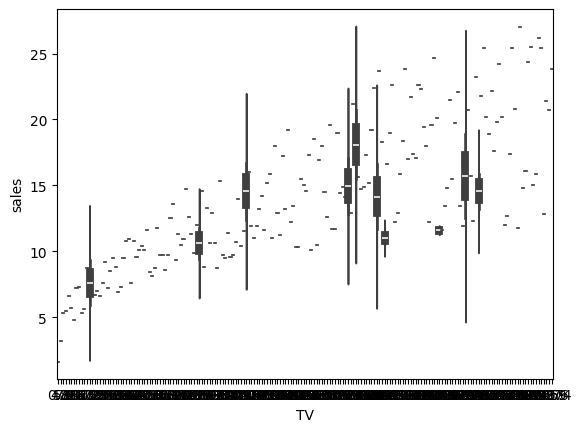

In [ ]:
sns.violinplot(x='TV'
                 ,y='sales', data=df)

<Axes: xlabel='TV', ylabel='sales'>

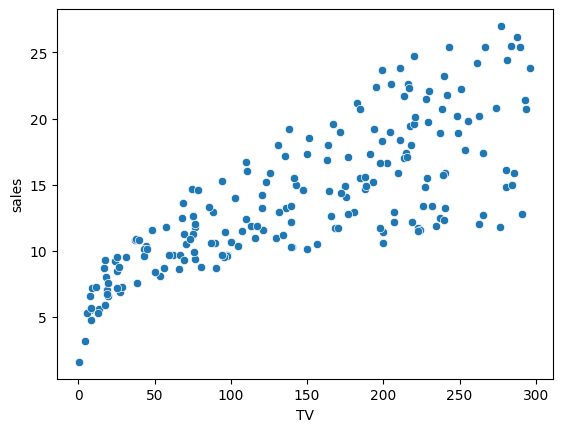

In [ ]:
sns.scatterplot(x='TV',y='sales', data=df)

<Axes: xlabel='radio', ylabel='sales'>

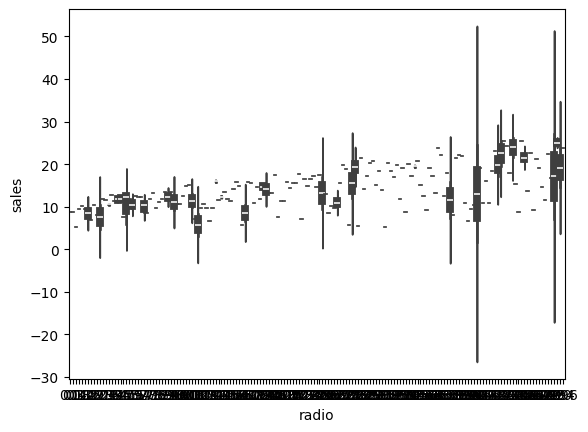

In [ ]:
sns.violinplot(x='radio' ,y='sales', data=df)

<Axes: xlabel='radio', ylabel='sales'>

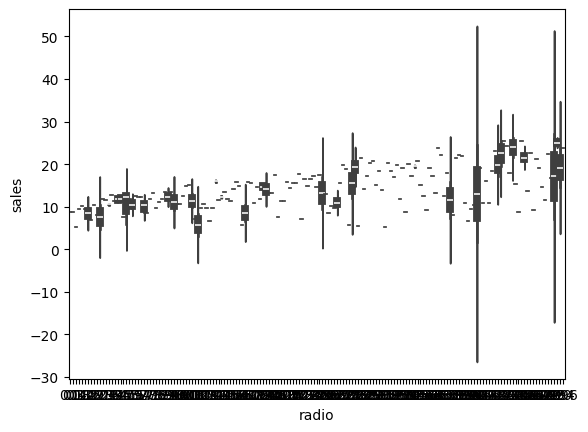

In [ ]:
sns.violinplot(x='radio' ,y='sales', data=df)

<Axes: xlabel='radio', ylabel='sales'>

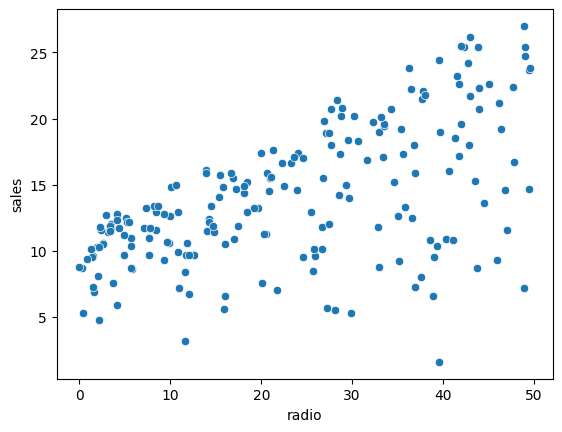

In [ ]:
sns.scatterplot(x='radio' ,y='sales', data=df)

<Axes: xlabel='newspaper', ylabel='sales'>

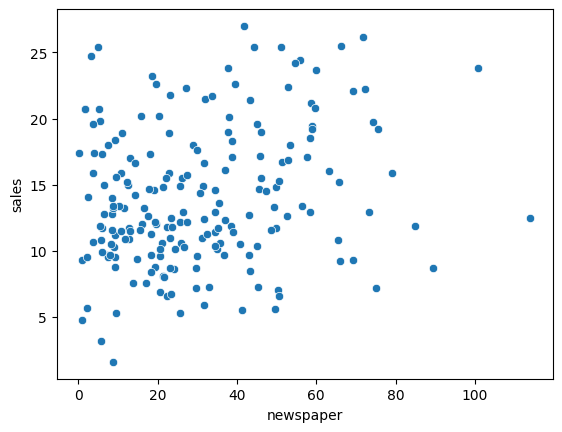

In [ ]:
sns.scatterplot(x='newspaper',y='sales', data=df)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)


In [ ]:

from sklearn.linear_model import LinearRegression


In [ ]:

model = LinearRegression()


In [ ]:

model.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing


In [ ]:

predictions = model.predict(X_test)


In [ ]:

predictions

array([21.66318307, 16.44137936,  7.69144625, 17.9163172 , 18.67047113,
       23.79199311, 16.2825425 , 13.44138683,  9.15294033, 17.32475313,
       14.43922876,  9.84019547, 17.26329945, 16.62853147, 15.09158705,
       15.50173894, 12.43404074, 17.32591521, 11.04327486, 18.05652777,
        9.35309526, 12.79465958,  8.73413846, 10.47225333, 11.38216042,
       15.02658554,  9.7406823 , 19.44676903, 18.19211174, 17.20178728,
       21.56359539, 14.70484262, 16.2635213 , 12.37098906, 19.97059316,
       15.36768988, 14.00399515, 10.0772945 , 20.91891557,  7.43833283,
        3.67031166,  7.27760354,  5.99523188, 18.41497546,  8.31868226,
       14.1090252 , 14.93697583, 20.35882814, 20.56271636, 19.55380813,
       24.10360923, 14.84985778,  6.71474914, 19.77761567, 18.93996367,
       12.5109195 , 14.20052652,  6.10844697, 15.3695344 ,  9.56769111])

In [ ]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  1.928924907466573
mean_absolute_error :  1.0548328405073322


In [ ]:
print("Accuracy of the model")
print("training Accuracy",model.score(X_train,y_train)*100)
print("Test Accuracy",model.score(X_test,y_test)*100)

Accuracy of the model
training Accuracy 88.50053786777522
Test Accuracy 92.24605706201434
